In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('NKE.csv', date_parser= True)

In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2503,2019-12-12,97.320000,98.180000,96.900002,97.720001,96.075104,4763208
2504,2019-12-13,97.430000,98.290001,96.910004,97.769997,96.124252,5248136
2505,2019-12-16,98.139999,99.339996,98.059998,98.809998,97.146744,8214040
2506,2019-12-17,99.379997,100.169998,99.050003,99.650002,97.972610,7054362
2507,2019-12-18,100.195000,100.790001,99.580002,100.570000,98.877129,7340058


In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,16.514999,16.517500,16.280001,16.337500,14.139745,11972588
1,2010-01-05,16.285000,16.447500,16.174999,16.402500,14.196001,6275456
2,2010-01-06,16.350000,16.422501,16.235001,16.302500,14.109450,13399228
3,2010-01-07,16.280001,16.500000,16.262501,16.462500,14.247930,7187644
4,2010-01-08,16.447500,16.462500,16.235001,16.430000,14.219799,7249636
...,...,...,...,...,...,...,...
2503,2019-12-12,97.320000,98.180000,96.900002,97.720001,96.075104,4763208
2504,2019-12-13,97.430000,98.290001,96.910004,97.769997,96.124252,5248136
2505,2019-12-16,98.139999,99.339996,98.059998,98.809998,97.146744,8214040
2506,2019-12-17,99.379997,100.169998,99.050003,99.650002,97.972610,7054362


In [6]:
data_train= data[data['Date']<'2017-12-21'].copy()


In [7]:
data_test= data[data['Date']>='2017-12-21'].copy()

In [8]:
training_data= data_train.drop(['Date','Adj Close','High', 'Low', 'Close', 'Volume'], axis =1)
training_data

,Open
0,16.514999
1,16.285000
2,16.350000
3,16.280001
4,16.447500
...,...
2002,64.430000
2003,64.889999
2004,64.930000
2005,65.150002


In [9]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)

In [10]:
training_data

array([[0.02105661],
       [0.01669354],
       [0.01792659],
       ...,
       [0.93948586],
       [0.94365928],
       [0.92924208]])

In [11]:
X_train =[]
y_train= []

In [12]:
for i in range(50,training_data.shape[0]):
    X_train.append(training_data[i-50:i])
    y_train.append(training_data[i,0])

In [13]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
X_train.shape, y_train.shape

((1957, 50, 1), (1957,))

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [17]:
regressor = Sequential()
regressor.add(LSTM(units = 96, return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 96, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 96,  return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 96))
regressor.add(Dropout(0.2))


regressor.add(Dense(units=1))



               
        

2021-12-15 19:22:43.545858: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/apurva/ns-allinone-2.35/otcl-1.14:/home/apurva/ns-allinone-2.35/lib
2021-12-15 19:22:43.545885: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-15 19:22:43.545905: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (apurva-Inspiron-5584): /proc/driver/nvidia/version does not exist
2021-12-15 19:22:43.546111: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

In [19]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
regressor.fit(X_train, y_train, epochs=12, batch_size=32)

Epoch 1/12
62/62 [==============================] - 5s 74ms/step - loss: 0.0021
Epoch 2/12
62/62 [==============================] - 5s 82ms/step - loss: 0.0019
Epoch 3/12
62/62 [==============================] - 9s 145ms/step - loss: 0.0022
Epoch 4/12
62/62 [==============================] - 9s 143ms/step - loss: 0.0018
Epoch 5/12
62/62 [==============================] - 8s 136ms/step - loss: 0.0017
Epoch 6/12
62/62 [==============================] - 8s 134ms/step - loss: 0.0018
Epoch 7/12
62/62 [==============================] - 8s 137ms/step - loss: 0.0018
Epoch 8/12
62/62 [==============================] - 9s 139ms/step - loss: 0.0017
Epoch 9/12
62/62 [==============================] - 9s 140ms/step - loss: 0.0015
Epoch 10/12
62/62 [==============================] - 9s 139ms/step - loss: 0.0017
Epoch 11/12
62/62 [==============================] - 8s 129ms/step - loss: 0.0015
Epoch 12/12
62/62 [==============================] - 8s 129ms/step - loss: 0.0014


In [22]:
past_50_days = data_train.tail(50)

In [23]:
df= past_50_days.append(data_test, ignore_index= True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-11,51.389999,51.520000,50.830002,51.029999,48.928177,9109648
1,2017-10-12,50.980000,51.119999,50.349998,50.830002,48.736412,10658445
2,2017-10-13,50.830002,51.070000,50.400002,50.980000,48.880241,16227948
3,2017-10-16,50.799999,51.404999,50.639999,51.369999,49.254173,9299326
4,2017-10-17,51.500000,52.040001,51.380001,52.000000,49.858231,9492675
...,...,...,...,...,...,...,...
546,2019-12-12,97.320000,98.180000,96.900002,97.720001,96.075104,4763208
547,2019-12-13,97.430000,98.290001,96.910004,97.769997,96.124252,5248136
548,2019-12-16,98.139999,99.339996,98.059998,98.809998,97.146744,8214040
549,2019-12-17,99.379997,100.169998,99.050003,99.650002,97.972610,7054362


In [24]:
df= df.drop(['Date', 'Adj Close','High', 'Low', 'Close', 'Volume'], axis=1)
df.head()

,Open
0,51.389999
1,50.980000
2,50.830002
3,50.799999
4,51.500000


In [25]:
inputs = scaler.transform(df)
inputs

array([[0.68263297],
       [0.67485532],
       [0.67200986],
       [0.67144071],
       [0.68471968],
       [0.69761923],
       [0.68775487],
       [0.70919091],
       [0.71431279],
       [0.73024755],
       [0.72133165],
       [0.75604659],
       [0.76666978],
       [0.76458307],
       [0.74637196],
       [0.75908177],
       [0.75395997],
       [0.75395997],
       [0.75661574],
       [0.76534189],
       [0.75111444],
       [0.76059941],
       [0.767808  ],
       [0.7636346 ],
       [0.76458307],
       [0.76932556],
       [0.78184571],
       [0.81826802],
       [0.81997531],
       [0.82756325],
       [0.83040875],
       [0.82699417],
       [0.83078817],
       [0.82244135],
       [0.84084222],
       [0.85089624],
       [0.85393143],
       [0.85108598],
       [0.85829459],
       [0.85374177],
       [0.84330833],
       [0.85544906],
       [0.87195289],
       [0.88029969],
       [0.88807737],
       [0.9300009 ],
       [0.93872705],
       [0.939

In [26]:
X_test= []
y_test= []

In [27]:
for i in range(50, inputs.shape[0]):
    X_test.append(inputs[i-50:i])
    y_test.append(inputs[i,0])

In [28]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((501, 50, 1), (501,))

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
scaler.scale_

array([0.01896993])

In [31]:
scale = 1/0.01896993

In [32]:
y_pred = y_pred*scale
y_test = y_test*scale

In [33]:
y_test

array([48.88500506, 45.79500481, 47.49500595, 48.155005  , 47.59500396,
       47.80500297, 47.44500194, 48.075004  , 47.99500599, 48.29500502,
       48.74500605, 48.82500706, 48.47500503, 48.62500304, 49.09500408,
       49.37500311, 48.26500201, 48.59500404, 49.90500215, 51.14500725,
       51.12500325, 51.93500032, 52.72500138, 52.79500139, 52.41500436,
       52.09500433, 52.09500433, 52.26500235, 51.81500531, 51.22500126,
       47.07500391, 49.74500614, 50.12500317, 48.35500202, 50.5350062 ,
       50.44500219, 50.31500518, 52.98500341, 52.49500636, 52.23500334,
       52.25500834, 51.84500431, 51.98500332, 52.98500341, 54.59500454,
       52.69500238, 51.83500231, 49.50500812, 50.07500716, 49.80500314,
       49.10500608, 49.15500209, 50.10500617, 51.24500626, 51.89500731,
       51.24500626, 51.08500225, 50.90500223, 50.29500118, 50.5350062 ,
       51.32500727, 50.19500217, 51.29500126, 49.67500613, 50.4850032 ,
       51.18500026, 50.29500118, 50.5650052 , 49.06500508, 50.56

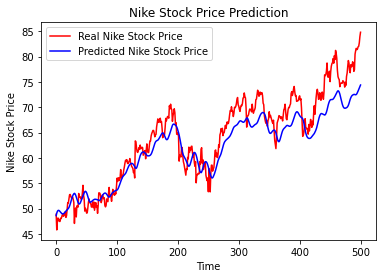

In [34]:
import matplotlib.pyplot as plt

plt.plot(y_test, color = 'red', label = 'Real Nike Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Nike Stock Price')
plt.title('Nike Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Nike Stock Price')
plt.legend()
plt.show()